In [155]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [259]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration
from pprint import pprint

def showPics(pics):
    
    plt.rcParams["figure.figsize"] = 16, 16
    n= len(pics)

    cols= 2
    rows= int((n+1)/cols)

    r= 1
    c= 1
    i= 1
    
    for pic in pics:
        if (c>cols):
            c= 0
            r+= 1
        
        plt.subplot(rows, cols, i)
        plt.imshow(pic[0])
        plt.title(pic[1])
        
        i+= 1
        c+= 1
        plt.axis('off')
            
    plt.gray()
    plt.subplots_adjust(wspace=0, hspace=0.1, top=1, bottom=0, left=0, right=1)
    plt.show()    
    
    return


original= io.imread('scaled.png')
blurred= io.imread('blurred.png')/255
kernel= np.load("swirl.npy")

print ("image:" , blurred.shape , "  min:" , np.min(blurred), "  max:" , np.max(blurred))
print ("kernel:" , kernel.shape , "  min:" , np.min(kernel), "  max:" , np.max(kernel))

showPics([
    [original, "original"], 
    [blurred, "blurred"],
    [psf, "psf"])


SyntaxError: invalid syntax (<ipython-input-259-f01590cb991e>, line 50)

In [258]:
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration
from pprint import pprint




psf = kernel + 0.001
astro = blurred.astype(float).copy()


#astro= color.rgb2gray(data.astronaut())
#psf = np.ones((5, 5)) / 25

astro= astro.copy() + (np.random.poisson(lam=25, size=astro.shape) - 10) / 25500.



print ("psf:" , psf.shape , "  min:" , np.min(psf), "  max:" , np.max(psf))
print ("image:" , astro.shape , "  min:" , np.min(astro), "  max:" , np.max(astro))

    
runs= 20
    
print()
print ('RL deconv ' + str(runs) + " iterations")

# Restore Image using Richardson-Lucy algorithm
deconv = restoration.richardson_lucy(astro, psf, iterations= runs)

#fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))


showPics([
    [original, "original"], 
    [psf, "psf"], 
    [blurred, "blurred"],
    [deconv, 'RL deconv ' + str(runs) + " iterations"])




SyntaxError: invalid syntax (<ipython-input-258-eca91c256b0c>, line 39)

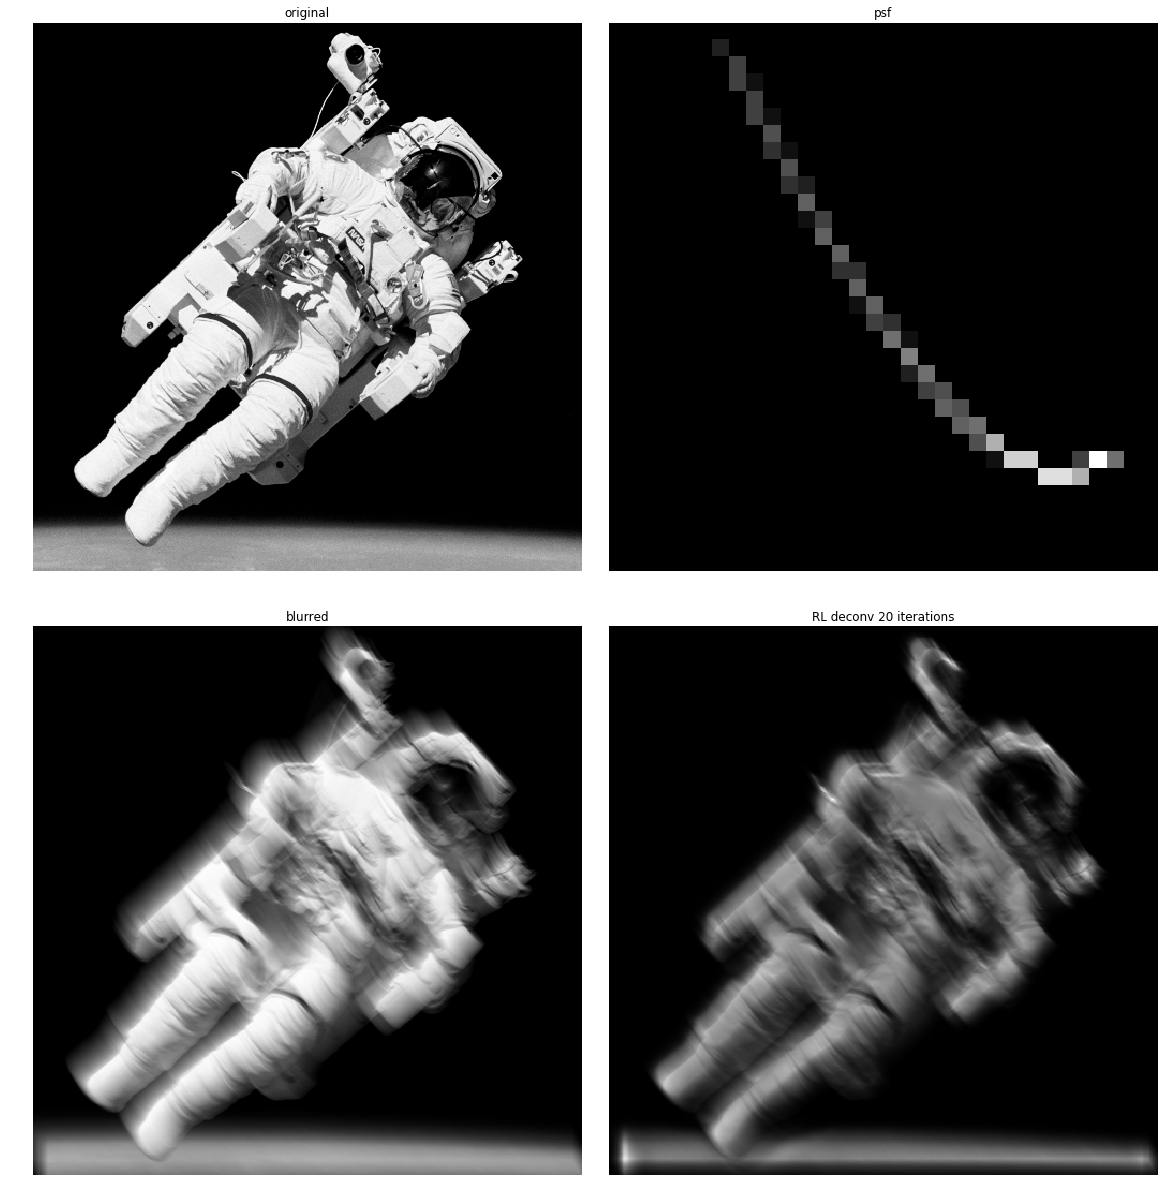

In [256]:
import scipy

def RL_deconv(image, psf, iterations):
   
    latent_est = image.copy()
  
    fsp = np.flipud(np.flipud(psf.copy()))
    
    fsp.dtype
    
    for i in range(1, iterations):
        
        est_conv      = scipy.signal.convolve2d(latent_est, psf, 'same')
        relative_blur = np.divide(image, est_conv)
        error_est     = conv2(relative_blur,fsp,'same') 
        latent_est    = np.multiply(latent_est, error_est)
    
    return latent_est

deco= RL_deconv(astro, psf, 5)

showPics([ 
    [original, "original"], 
    [psf, "psf"], 
    [blurred, "blurred"],
    [deco, 'RL deconv ' + str(runs) + " iterations"]])

In [233]:
a = np.array([[1, 2,3],
    [4,5,6],
    [7,8,9]
      ])

a

b=np.flipud(a)

b

c= np.fliplr(b)

c


array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])